In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Per_ult1.csv")
df[[i for i in df.columns if 'per' in i]].describe()

,per_of_cn_semantics_0,per_of_cn_kwg_0,per_of_cn_sir_0,per_of_en_semantics_0,per_of_en_kwg_0,per_of_en_sir_0,per_of_RecursivePara_semantics_0,per_of_RecursivePara_semantics_1,per_of_RecursivePara_semantics_2,per_of_RecursivePara_semantics_3,...,per_of_RecursivePara_SIR_3,per_of_RecursivePara_SIR_4,per_of_PivotTranslation_semantics_0,per_of_PivotTranslation_kwg_0,per_of_PivotTranslation_sir_0,per_of_NormalTranslation_semantics_0,per_of_NormalTranslation_kwg_0,per_of_NormalTranslation_sir_0,per_of_inputs_cn_0,per_of_inputs_en_0
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,21.771222,17.271971,17.268085,53.570123,25.124003,25.147391,72.412828,67.550791,66.285041,59.749083,...,61.780514,58.410486,36.834438,26.021851,27.283658,30.494151,26.105485,27.756097,17.271971,25.124003
std,17.219178,9.752589,9.754125,44.000110,18.821298,18.885883,73.950658,58.313359,56.672813,45.196822,...,38.722986,39.375648,52.616672,19.114740,19.830193,26.395805,19.201262,23.082431,9.752589,18.821298
min,5.572348,5.572348,5.572348,3.292984,3.292984,3.292984,7.606812,11.176101,8.108744,14.498585,...,11.718994,11.271035,3.292984,3.292984,3.292984,3.292984,3.292984,3.292984,5.572348,3.292984
25%,11.299222,11.157761,11.157761,25.920447,13.706877,13.442638,35.917950,34.584986,31.733051,31.419506,...,31.454751,30.652701,16.687671,13.940972,14.853836,15.159112,13.940972,14.826765,11.157761,13.706877
50%,15.796241,14.622262,14.622262,42.264744,19.033783,19.629847,50.461493,51.155741,50.646023,48.843037,...,50.483881,49.556219,26.182279,21.198884,21.854524,22.160789,21.198884,21.198884,14.622262,19.033783
75%,24.219810,19.238653,19.238653,64.192065,29.942201,30.351958,76.975708,72.421030,81.656862,66.530529,...,78.193451,68.886581,37.069681,31.262760,33.619121,34.594963,31.262760,31.826923,19.238653,29.942201
max,105.526466,63.151005,63.151005,286.005646,129.825012,129.825012,499.911621,383.580566,394.923676,310.611511,...,189.503799,234.144028,456.701355,134.790070,134.790070,175.163452,134.790070,134.790070,63.151005,129.825012


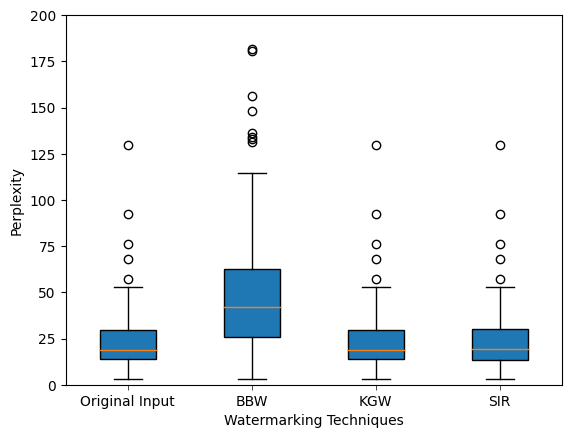

In [45]:
a = []
labels = ['Original Input']
for i in df.columns:
    if 'per_of_en' in i:
        a.append(i)
        if 'kwg' in i:
            labels.append('KGW')
        elif 'semantics' in i:
            labels.append('BBW')
        else:
            labels.append(i.split('_')[-2].upper())
a = ['per_of_inputs_en_0'] + a
plt.tick_params(axis='x', width=0.5)
boxplot = plt.boxplot(df[a], labels = labels,  patch_artist=True, widths=0.45)
plt.ylim(0, 200)  
plt.ylabel("Perplexity")
plt.xlabel("Watermarking Techniques")
plt.savefig('Dataset/Graphs/perp.png')
plt.show()

In [4]:
df = df[df['per_of_en_semantics_0'] != df['per_of_en_semantics_0'].max()]

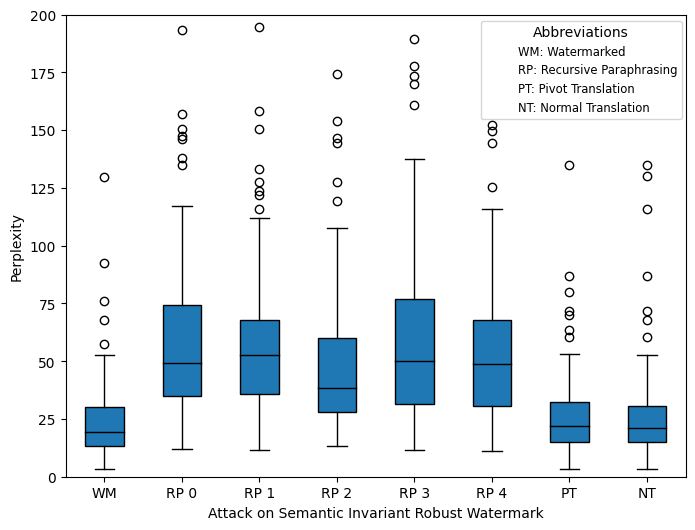

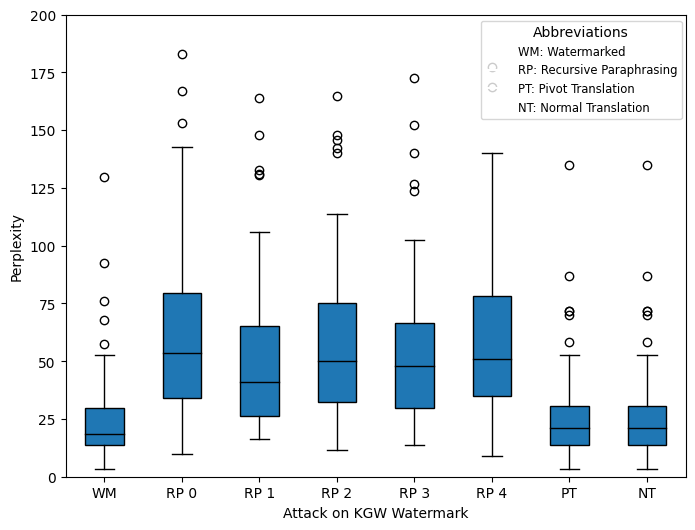

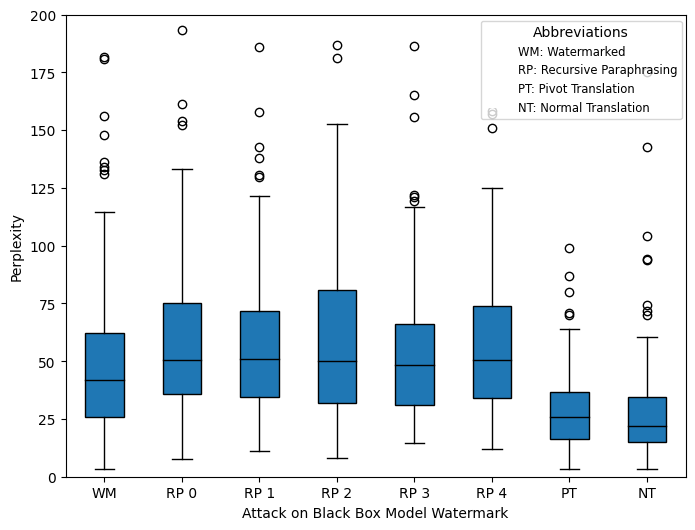

In [38]:
watermarks = ['sir', 'kwg', 'semantics']
for wm in watermarks:
    a = []
    labels = []
    for i in df.columns:
        if 'seq' in i or 'cn' in i:
            continue
        if wm in i.lower():
            a.append(i)
            if 'en' in i:
                labels.append("WM")
            elif 'Para' in i:
                labels.append(" ".join(['RP'] + i.split('_')[-1:]))
            elif 'Pivot' in i:
                labels.append('PT')
            else:
                labels.append('NT')

    watermark_name = 'Semantic Invariant Robust' if wm == 'sir' else 'KGW' if wm == 'kwg' else 'Black Box Model'
    plt.figure(figsize=(8,6))
    plt.ylim(0, 200)  
    plt.ylabel("Perplexity")
    plt.xlabel(f"Attack on {watermark_name} Watermark")
    # colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgray']
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

    boxplot = plt.boxplot(df[a], labels = labels,  patch_artist=True)
    # for patch, color in zip(boxplot['boxes'], colors):
    #     patch.set_facecolor(color)

    for whisker in boxplot['whiskers']:
        whisker.set_color('black')
    for median in boxplot['medians']:
        median.set_color('black')
    plt.xticks(range(1, len(labels) + 1), labels, rotation=0)

    handles = [plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='WM: Watermarked'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='RP: Recursive Paraphrasing'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='PT: Pivot Translation'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='NT: Normal Translation')]

    plt.legend(handles=handles, title='Abbreviations', loc='upper left', bbox_to_anchor=(0.66, 1), fontsize='small',)
    # Add legend manually
    # plt.legend(['WM', 'RP 0', 'RP 1', 'RP 2', 'RP 3', 'RP 4', 'PT', 'NT'])

    plt.savefig(f'Dataset/Graphs/{wm}.png')
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


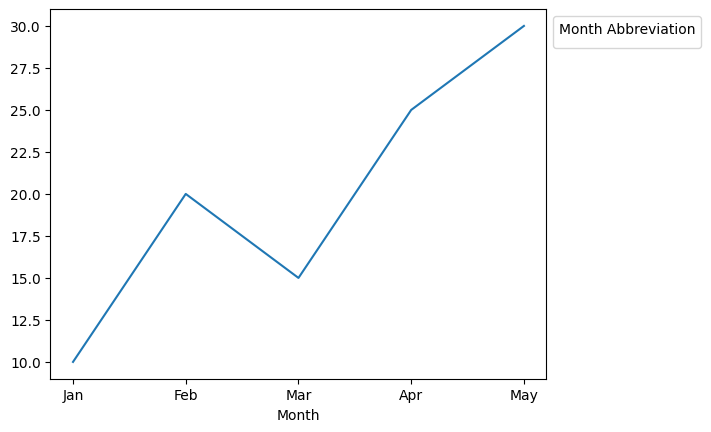

In [18]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.plot(x, y)
plt.xticks(x, labels)  # Set the x-axis labels
plt.xlabel('Month')

# Create a custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='January'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='February'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='March'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='April'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='May')]

plt.legend(title='Month Abbreviation', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [7]:
# import os

# directory = 'Dataset/conf'
# files = os.listdir(directory)

# for i, file_name in enumerate(files):
#     if 'kwg' in file_name:
#         model = 'kwg_'
#     elif 'sir' in file_name:
#         model = 'sir_'
#     else:
#         model = 'semantics_'
    
#     if 'pivot_translate' in file_name:
#         model += 'pivot_translated'
#     elif 'translated' in file_name:
#         model += 'translated'
#     else:
#         model += 'recursive'
#     print(model)
#     # continue
#     old_file_path = os.path.join(directory, file_name)
#     new_file_path = os.path.join(directory, model)
    
#     os.rename(old_file_path, new_file_path)

sir_translated
kwg_pivot_translated
kwg_recursive
semantics_pivot_translated
semantics_recursive
sir_pivot_translated
kwg_recursive
sir_recursive
semantics_translated


In [9]:
import json
import os

In [7]:
import glob
import pickle
d = {}
dir = 'Dataset/Attacked/NewDataScores/*/*/*'
for file in glob.glob(dir):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    key = file.lower()
    print(key)
    d[key] = sum(data)/len(data)

dataset/attacked/newdatascores/paraphraed_pivottranslation/semantics/llm_watermarked_semantics_pivot_translated_scores.pkl
dataset/attacked/newdatascores/paraphraed_pivottranslation/sir/llm_watermarked_sir_pivot_translated_scores.pkl
dataset/attacked/newdatascores/paraphraed_pivottranslation/kwg/llm_watermarked_kwg_pivot_translated_scores.pkl
dataset/attacked/newdatascores/paraphrased_normaltranslation/semantics/llm_watermarked_semantics_translated_scores.pkl
dataset/attacked/newdatascores/paraphrased_normaltranslation/sir/llm_watermarked_sir_translated_scores.pkl
dataset/attacked/newdatascores/paraphrased_normaltranslation/kwg/llm_watermarked_kwg_translated_scores.pkl
dataset/attacked/newdatascores/translation_paraphrased/semantics/watermark_dipper2_scores.pkl
dataset/attacked/newdatascores/translation_paraphrased/semantics/watermark_dipper1_scores.pkl
dataset/attacked/newdatascores/translation_paraphrased/semantics/watermark_dipper0_scores.pkl
dataset/attacked/newdatascores/translati

In [8]:
import pandas as pd

In [30]:
col = ['Pivot Translation + paraphrase', 'Normal translation + paraphrase', 'rec_tr0', 'rec_tr1', 'rec_tr2', 'rec_tr3', 'rec_tr4']
s = []
k = []
b = []
for i in sorted(d.keys()):
    print(i, d[i])
    if 'sir' in i:
        s.append(d[i])
    elif 'kwg' in i:
        k.append(d[i])
    else:
        b.append(d[i])

q = pd.DataFrame([s,k , b], index=['SIR', 'KGW' , 'Black Box'],columns  = col)
q

dataset/attacked/newdatascores/paraphraed_pivottranslation/kwg/llm_watermarked_kwg_pivot_translated_scores.pkl 19.699988743832918
dataset/attacked/newdatascores/paraphraed_pivottranslation/semantics/llm_watermarked_semantics_pivot_translated_scores.pkl 52.01283103625462
dataset/attacked/newdatascores/paraphraed_pivottranslation/sir/llm_watermarked_sir_pivot_translated_scores.pkl 12.385194737842475
dataset/attacked/newdatascores/paraphrased_normaltranslation/kwg/llm_watermarked_kwg_translated_scores.pkl 41.72545998333427
dataset/attacked/newdatascores/paraphrased_normaltranslation/semantics/llm_watermarked_semantics_translated_scores.pkl 64.98584115018355
dataset/attacked/newdatascores/paraphrased_normaltranslation/sir/llm_watermarked_sir_translated_scores.pkl 11.260316548018723
dataset/attacked/newdatascores/translation_paraphrased/kwg/rephrased0_scores.pkl 41.50331931896218
dataset/attacked/newdatascores/translation_paraphrased/kwg/rephrased1_scores.pkl 31.71027951627192
dataset/attac

,Pivot Translation + paraphrase,Normal translation + paraphrase,rec_tr0,rec_tr1,rec_tr2,rec_tr3,rec_tr4
SIR,12.385195,11.260317,13.357434,12.945792,11.709901,13.563280,13.579691
KGW,19.699989,41.725460,41.503319,31.710280,24.203664,21.470526,21.250810
Black Box,52.012831,64.985841,75.047878,66.752029,57.300735,57.708208,55.251461


In [15]:
import os
import json

In [21]:
directory = 'Dataset/conf'
files = os.listdir(directory)
dfs = []
for file in files:
    with open(os.path.join(directory, file)) as f:
        a = json.load(f)
    df = pd.DataFrame(a)
    df = df.add_prefix(file.split('_')[1].split('.')[0] + '_')
    dfs.append([file,df])

In [22]:
kwg = None
sir = None
sem = None
for i in range(len(dfs)):
    if 'kwg' in dfs[i][0]:
        if kwg is None:
            kwg = dfs[i][1]
        else:
            kwg = pd.concat([kwg, dfs[i][1]], axis = 1)
    elif 'sir' in dfs[i][0]:
        if sir is None:
            sir = dfs[i][1]
        else:
            sir = pd.concat([sir, dfs[i][1]], axis = 1)

    else:
        if sem is None:
            sem = dfs[i][1]
        else:
            sem = pd.concat([sem, dfs[i][1]], axis = 1)
        # print(dfs[i][1])
kwg = kwg[['pivot_original', 'pivot_watermarked'] + [i for i in kwg.columns if 'original' not in i and 'watermarked' not in i]]
sir = sir[['pivot_original', 'pivot_watermarked'] + [i for i in sir.columns if 'original' not in i and 'watermarked' not in i]]
sem = sem[['pivot_original', 'pivot_watermarked'] + [i for i in sem.columns if 'original' not in i and 'watermark' not in i]]


In [23]:
b = []
for df in [kwg, sir, sem]:
    a = []
    for i in kwg.columns:
        a.append(df[i].mean())
    b.append(a)


In [24]:
col = ['Original', 'Watermarked', 'Translation Attack',
       'Pivot Attack', 'Recursive Attack 1', 'Recursive Attack 2',
       'Recursive Attack 3', 'Recursive Attack 4', 'Recursive Attack 5']
ind = ['KGW', 'SIR', 'Black Box']

In [25]:
table = pd.DataFrame(b, index=ind, columns=col)

In [26]:
tati = table.T

In [114]:
table.to_csv('confidences.csv')

In [35]:
pd.concat([tati , q.T]  , axis = 1)

,KGW,SIR,Black Box,SIR,KGW,Black Box
Original,16.696966,28.602707,50.0224,NaN,NaN,NaN
Watermarked,93.643111,83.479007,92.9958,NaN,NaN,NaN
Translation Attack,39.030686,25.916131,52.5938,NaN,NaN,NaN
Pivot Attack,60.203086,61.097640,91.2459,NaN,NaN,NaN
Recursive Attack 1,36.853426,51.584850,78.1890,NaN,NaN,NaN
Recursive Attack 2,26.887068,44.338295,68.1249,NaN,NaN,NaN
Recursive Attack 3,22.775357,41.077246,66.8391,NaN,NaN,NaN
Recursive Attack 4,16.858977,36.244709,62.5321,NaN,NaN,NaN
Recursive Attack 5,82.447881,61.810258,82.9716,NaN,NaN,NaN
Pivot Translation + paraphrase,NaN,NaN,NaN,12.385195,19.699989,52.012831


In [39]:
tati.join(q.T)

ValueError: columns overlap but no suffix specified: Index(['KGW', 'SIR', 'Black Box'], dtype='object')

In [40]:
df1 =tati 
df2 = q.T

In [45]:
# assuming df1 and df2 are your dataframes and 'key' is the column you want to merge on
# assuming df1 and df2 are your dataframes
common_columns = list(set(df1.columns) & set(df2.columns))
# assuming df1 and df2 are your dataframes
result = df1.merge(df2, left_index=True, right_index=True, how='outer')

In [46]:
result

,KGW_x,SIR_x,Black Box_x,SIR_y,KGW_y,Black Box_y
Normal translation + paraphrase,NaN,NaN,NaN,11.260317,41.725460,64.985841
Original,16.696966,28.602707,50.0224,NaN,NaN,NaN
Pivot Attack,60.203086,61.097640,91.2459,NaN,NaN,NaN
Pivot Translation + paraphrase,NaN,NaN,NaN,12.385195,19.699989,52.012831
Recursive Attack 1,36.853426,51.584850,78.1890,NaN,NaN,NaN
Recursive Attack 2,26.887068,44.338295,68.1249,NaN,NaN,NaN
Recursive Attack 3,22.775357,41.077246,66.8391,NaN,NaN,NaN
Recursive Attack 4,16.858977,36.244709,62.5321,NaN,NaN,NaN
Recursive Attack 5,82.447881,61.810258,82.9716,NaN,NaN,NaN
Translation Attack,39.030686,25.916131,52.5938,NaN,NaN,NaN


In [52]:
result = None
for col in common_columns:
    if result is None:
        result = pd.concat([df1[col] , df2[col]], axis = 0)
    else :
        result = pd.concat([result, pd.concat([df1[col] , df2[col]], axis = 0)], axis = 1)
result

,KGW,Black Box,SIR
Original,16.696966,50.022400,28.602707
Watermarked,93.643111,92.995800,83.479007
Translation Attack,39.030686,52.593800,25.916131
Pivot Attack,60.203086,91.245900,61.097640
Recursive Attack 1,36.853426,78.189000,51.584850
Recursive Attack 2,26.887068,68.124900,44.338295
Recursive Attack 3,22.775357,66.839100,41.077246
Recursive Attack 4,16.858977,62.532100,36.244709
Recursive Attack 5,82.447881,82.971600,61.810258
Pivot Translation + paraphrase,19.699989,52.012831,12.385195
